In [3]:
# Initializations
library(ggplot2)
library(e1071)
library(nnet)
install.packages("ISLR")
install.packages("dplyr")
library(dplyr)
library(ISLR)


The downloaded binary packages are in
	/var/folders/dg/j2pn79ns2hs4htwgp1cp3v8c0000gn/T//RtmpY4s9a7/downloaded_packages

The downloaded binary packages are in
	/var/folders/dg/j2pn79ns2hs4htwgp1cp3v8c0000gn/T//RtmpY4s9a7/downloaded_packages


In [4]:
# Data and notebook setup

#### import, inspect data elements
setwd("/Users/alecpaulson/Desktop")
raw <- read.csv("IMA Recommendation Simulation Data.csv")
raw <- subset(raw,select=-c(X))
head(raw,10)
names(raw)
dim(raw) # data shape

#### inspect levels of inferential target - there 7 non-missing levels of the inferential target
unique(raw$CurrentCondition)
raw1 <- raw[which(raw$CurrentCondition != ""),] # remove missing target level
100* table(raw1$CurrentCondition) / dim(raw1)[1]

,request_id,week_id,weekday,miles,order_equipment_type,order_distance,order_num_stops,order_origin_weight,lead_days,color,origin_dat_ref,dest_dat_ref,rate_norm,est_cost_norm,CurrentCondition
,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
1,c2653eda11cd4d94879d1946392eb2b5,4,Sat,1856,V,1848,2,40000,3,RED,633,978,2.2734418,2.1386311,Accepted
2,65e3dcc84a2246e68ea8636a967b31b2,3,Mon,56,V,47,2,12729,3,RED,604,604,-0.9710296,-1.0170243,Rejected
3,0a86f005640a4204b46c95ca033a7ced,1,Fri,259,V,255,2,44176,3,RED,761,770,-0.3933519,-0.4758051,Accepted
4,1105b4bc7b444f7985d4ad810e7acbc2,3,Thu,71,V,68,2,39847,6,RED,187,180,-0.7065458,-0.7658554,Rejected
5,de538100bb0f4137961b9551640ef35e,3,Fri,1182,R,1183,2,34912,3,GREEN,972,922,1.0142333,0.4692729,Accepted
6,07a9cc6adbe642748618a5c8e61348a1,4,Tue,1205,V,1166,2,44493,1,RED,775,551,0.4255890,1.4423836,Accepted
7,1de99bdecbf147ee8a8d4b00c812f836,4,Tue,952,V,940,2,13352,3,RED,605,10,1.3152568,1.6430496,Accepted
8,6e07ff5c7f7e4d27976b9779dab3f4fd,3,Fri,671,V,644,2,26763,3,GREEN,610,378,0.5705724,-0.1260114,Withdrawn
9,8f67eb6f89ff40bcb4289f1f62227df6,1,Wed,154,V,141,2,45679,6,YELLOW,326,347,-0.1543305,-1.2823680,Accepted


[1] "request_id"           "week_id"              "weekday"             
 [4] "miles"                "order_equipment_type" "order_distance"      
 [7] "order_num_stops"      "order_origin_weight"  "lead_days"           
[10] "color"                "origin_dat_ref"       "dest_dat_ref"        
[13] "rate_norm"            "est_cost_norm"        "CurrentCondition"

[1] 161563     15

[1] "Accepted"                  "Rejected"                 
[3] "Withdrawn"                 "Waiting On Acceptance"    
[5] "Cancelled"                 ""                         
[7] "Waiting On Recommendation" "NoPace"


                 Accepted                 Cancelled                    NoPace 
              59.56517700                2.09854749                0.03344792 
                 Rejected     Waiting On Acceptance Waiting On Recommendation 
              23.00659667                0.49552479                0.05884357 
                Withdrawn 
              14.74186255 

[1] 161444

[1] 161445     15

,request_id,week_id,weekday,miles,order_equipment_type,order_distance,order_num_stops,order_origin_weight,lead_days,color,origin_dat_ref,dest_dat_ref,rate_norm,est_cost_norm,CurrentCondition
,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<chr>
81224,f0293ccd87b445f5989c6c68726608dc,3,Fri,147,V,151,2,45007,3,RED,983,972,-0.6218265,-0.3533527,Withdrawn
81225,f0293ccd87b445f5989c6c68726608dc,3,Fri,147,V,151,2,45007,3,RED,983,972,-0.6218265,-0.3533527,Withdrawn


[1] 161444     15

request_id              week_id              weekday 
                   0                    0                    0 
               miles order_equipment_type       order_distance 
                   0                    0                 4678 
     order_num_stops  order_origin_weight            lead_days 
                   0                   19                    0 
               color       origin_dat_ref         dest_dat_ref 
                   0                    0                    0 
           rate_norm        est_cost_norm     CurrentCondition 
                 181                   39                    0

[1] "miles"               "order_distance"      "order_origin_weight"
[4] "lead_days"           "rate_norm"           "est_cost_norm"

,miles,order_distance,order_origin_weight,lead_days,rate_norm,est_cost_norm
miles,1.00000000,0.98227008,-0.01039877,0.025699588,0.701191133,0.745788683
order_distance,0.98227008,1.00000000,-0.01005972,0.027588610,0.689047918,0.730781284
order_origin_weight,-0.01039877,-0.01005972,1.00000000,0.011676543,-0.008708150,-0.011077201
lead_days,0.02569959,0.02758861,0.01167654,1.000000000,-0.006124653,-0.005707185
rate_norm,0.70119113,0.68904792,-0.00870815,-0.006124653,1.000000000,0.805328260
est_cost_norm,0.74578868,0.73078128,-0.01107720,-0.005707185,0.805328260,1.000000000


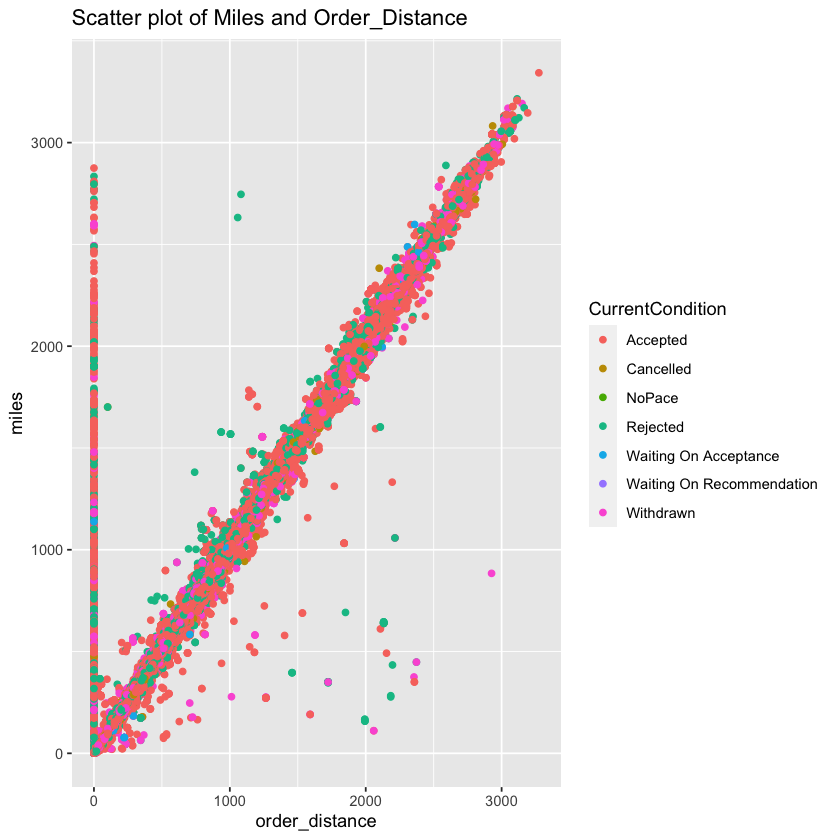

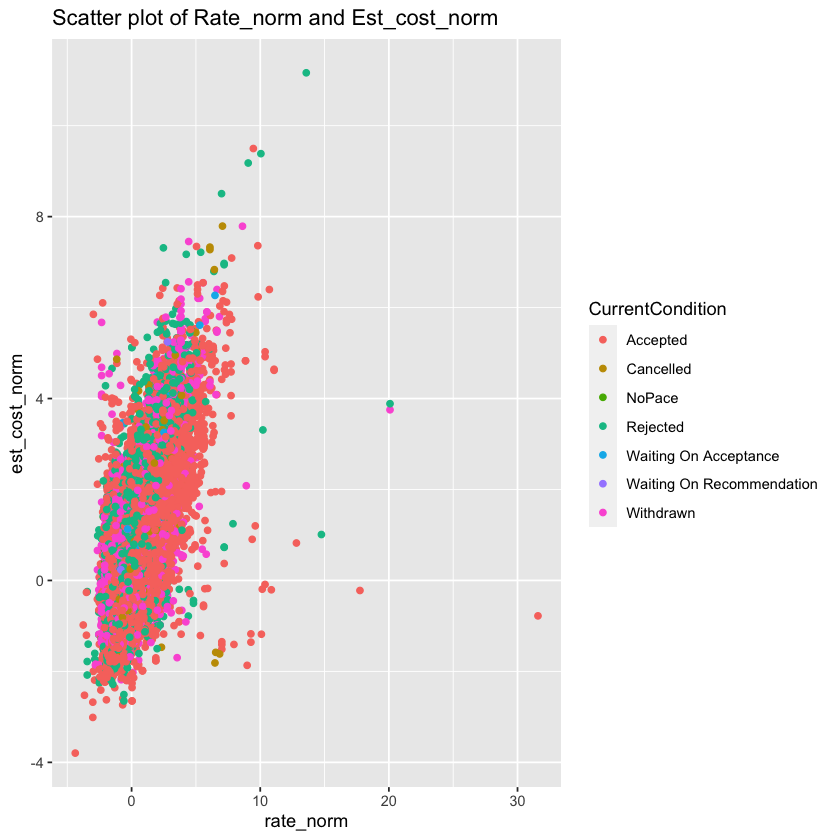

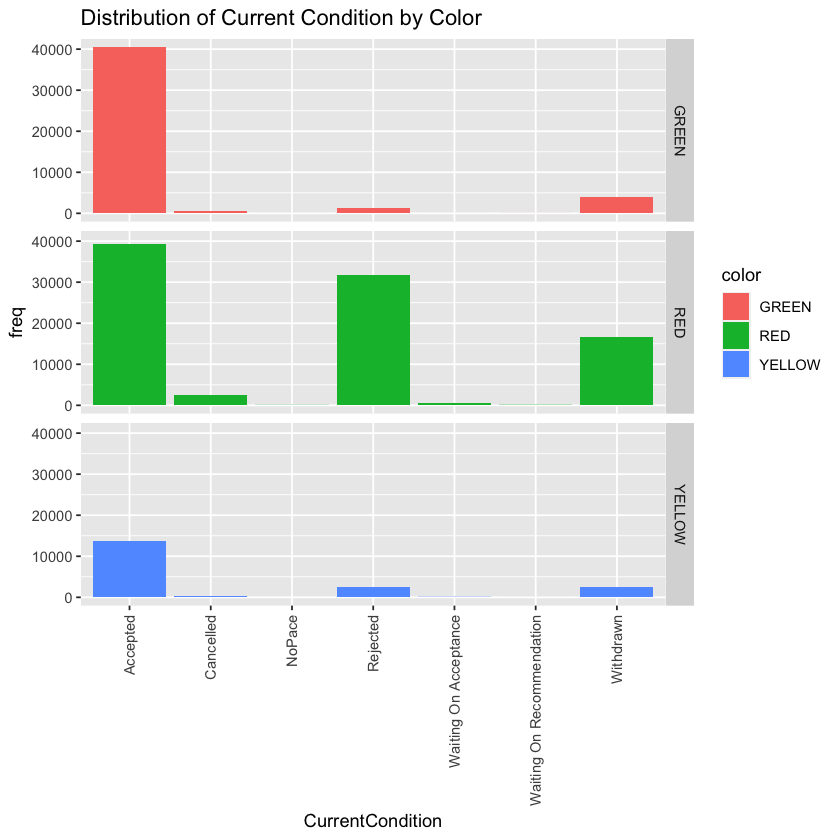

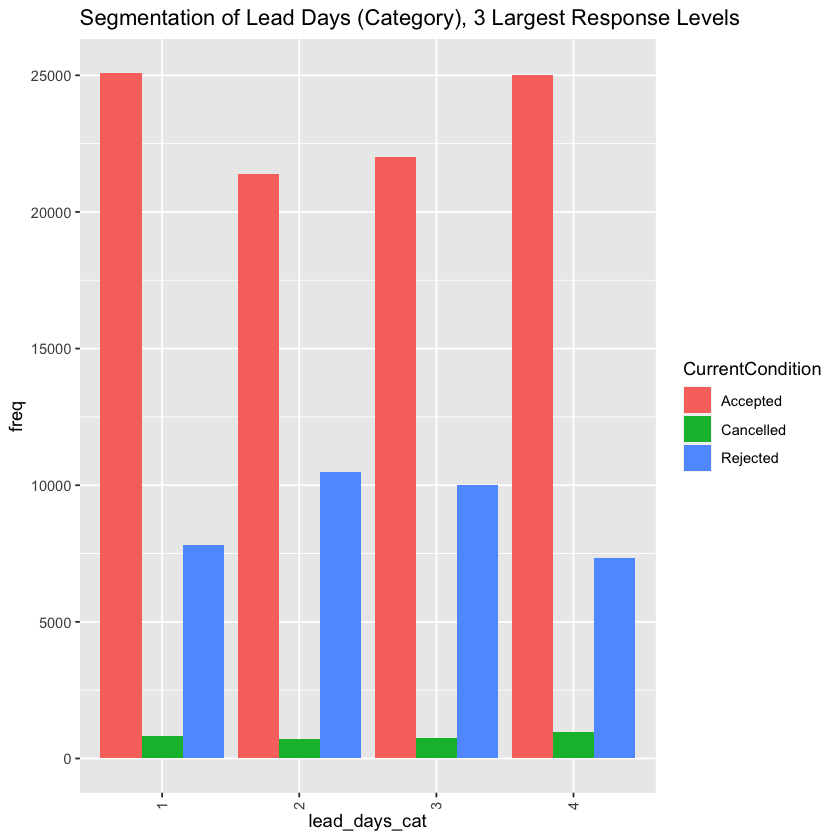

In [5]:
# Exploratory data analysis

#### is request_id unique?

length(unique(raw1$request_id)); dim(raw1) # appears to be one duplicate

# find the duplicate, inspect it
dups <- duplicated(raw1$request_id)

#### this is a true duplicate. let's remove one of these duplicated rows from the sample, keep the other.
raw1[raw1$request_id %in% unique(raw1$request_id[dups]),]
raw2 <- raw1[!dups,]
dim(raw2)

#### Is there any missing data in this data set? If so, which columns have missing data?
sapply(raw2, function(x) sum(is.na(x)))

####  following features have missing data: (1) order_distance, (2) order_origin_weight, 
####  (3) rate_nrom, (4) est_cost_norm

####  Are there any features you would consider highly correlated? Please limit this to two
####  pairs and describe why you selected the two pairs. Demonstrate this correlation
####  numerically and visually.

####  make a couple of the variables character, based on data dictionary
raw2$order_num_stops <- as.character(raw2$order_num_stops)
raw2$origin_dat_ref <- as.character(raw2$origin_dat_ref)
raw2$dest_dat_ref <- as.character(raw2$dest_dat_ref)
raw2$week_id <- as.character(raw2$week_id)

####  start with numeric variables
num.cols <- unlist(lapply(raw2, is.numeric))
names(raw2)[num.cols]
cor(raw2[complete.cases(raw2),num.cols])
####  ====> (1) miles/order_distance, (2) rate_nrom/est_cost_norm are highly correlated

#### plot numeric variable pairs exhibiting correlation

#### miles/order_distance appear to be linear functions of one another. But, there exists requests
####  for which the miles are greater than zero, but order distance is zero. This makes better sense on 
####  inspection of the data dictionary.
plotDat <-raw2[complete.cases(raw2),]
ggplot(plotDat, aes(x=order_distance, y=miles, color=CurrentCondition)) +
    geom_point() +
    ggtitle("Scatter plot of Miles and Order_Distance")

####  shipment costs correlate with customer payments, makes sense.
ggplot(plotDat, aes(x=rate_norm, y=est_cost_norm, color=CurrentCondition)) +
    geom_point() +
    ggtitle("Scatter plot of Rate_norm and Est_cost_norm")

#### assess correlations between target and categorical variables
##### color appears to differentiate the levels of CurrentCondition
plotDat$freq <-1
freqs <- aggregate(freq ~ CurrentCondition+color,data=plotDat,FUN=sum)

ggplot(freqs, aes(x=CurrentCondition, y=freq, fill=color))+
    geom_bar(stat="identity",position="dodge")+
    facet_grid(color~.)+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    ggtitle(paste0("Distribution of Current Condition by Color",sep=""))

#### Should lead days be considered a candidate for re-bucketing/levelling?
#### Prior is that the information on effect of lead days does not differ 
#### between, say, 63 and 64 lead days -- can be grouped together. We may
#### be able to segment the levels of current condition better by bucketing
#### lead days into different subsets. Graphical evidence:
       
plotDat$lead_days_cat <- as.factor(ntile(plotDat$lead_days,4))

freqs <- aggregate(freq ~ CurrentCondition+lead_days_cat,data=plotDat,FUN=sum)
freqs.sig <- freqs[which(freqs$CurrentCondition %in% c("Accepted","Cancelled","Rejected")),]

ggplot(freqs.sig, aes(x=lead_days_cat, y=freq, fill=CurrentCondition))+
    geom_bar(stat="identity",position="dodge")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
    ggtitle(paste0("Segmentation of Lead Days (Category), 3 Largest Response Levels",sep=""))

In [6]:
# Classification modeling - 2 approaches

raw2$CurrentCondition.f <- as.factor(raw2$CurrentCondition)
raw2$lead_days.f <- as.factor(ntile(raw2$lead_days,4))
#raw3 <- subset(raw2, select = -c(CurrentCondition,request_id,lead_days.f))
raw3 <- subset(raw2, select = -c(CurrentCondition,request_id,lead_days))
raw4 <- raw3[complete.cases(raw3),]

set.seed(1212)
train.size <- 6/10
train.rows <- sample(1:dim(raw4)[1],round(dim(raw4)[1]*train.size),replace=FALSE)
train.data <- raw4[train.rows,]
test.data <- raw4[train.rows,]
names(train.data)

#### on this split order_num_stops has a single level. drop this variable
#### drop date references - these are treated as intelligence-free in the model
train.data <- subset(train.data,select = -c(order_num_stops))
test.data <- subset(test.data,select = -c(order_num_stops))

[1] "week_id"              "weekday"              "miles"               
 [4] "order_equipment_type" "order_distance"       "order_num_stops"     
 [7] "order_origin_weight"  "color"                "origin_dat_ref"      
[10] "dest_dat_ref"         "rate_norm"            "est_cost_norm"       
[13] "CurrentCondition.f"   "lead_days.f"

In [7]:
## Try Naive Bayes

#### model
nb <- naiveBayes(CurrentCondition.f ~ .,data=train.data)
summary(nb)
table(predict(nb,test.data))
results <- cbind(test.data$CurrentCondition.f,predict(nb,test.data))

conf.mat.nb <- as.matrix(table(results[,1],results[,2]))

          Length Class  Mode     
apriori    7     table  numeric  
tables    12     -none- list     
levels     7     -none- character
isnumeric 12     -none- logical  
call       4     -none- call     


                 Accepted                 Cancelled                    NoPace 
                    56026                      1128                        60 
                 Rejected     Waiting On Acceptance Waiting On Recommendation 
                    24995                       955                        18 
                Withdrawn 
                    10759 

In [8]:
## Try multinomial regression

#### model 
mn.mod <- multinom(CurrentCondition.f ~ week_id+weekday+order_equipment_type+order_distance+
                   order_origin_weight+lead_days.f+color+est_cost_norm, data =train.data)
summary(mn.mod)
preds <- predict(mn.mod,test.data)
results <- as.data.frame(cbind(test.data$CurrentCondition.f,preds))

conf.mat.mn <- as.matrix(table(results[,1],results[,2]))

# weights:  140 (114 variable)
initial  value 182800.745312 
iter  10 value 143250.619438
iter  20 value 106202.026826
iter  30 value 102923.411929
iter  40 value 98558.559292
iter  50 value 95494.693943
iter  60 value 93314.105285
iter  70 value 91849.281550
iter  80 value 90951.810470
iter  90 value 89363.556775
iter 100 value 87816.182223
final  value 87816.182223 
stopped after 100 iterations


Call:
multinom(formula = CurrentCondition.f ~ week_id + weekday + order_equipment_type + 
    order_distance + order_origin_weight + lead_days.f + color + 
    est_cost_norm, data = train.data)

Coefficients:
                          (Intercept)    week_id2   week_id3     week_id4
Cancelled                   -4.884628 -0.18738749  0.6050465  0.043466796
NoPace                      -5.798194  1.09763842  1.5937755  1.774272017
Rejected                    -3.733776  0.03058073 -0.1799621 -0.001459444
Waiting On Acceptance       -6.064229  1.23700581  0.3696768  0.708845038
Waiting On Recommendation   -4.774831 -0.89876692 -0.9217481 -0.594122533
Withdrawn                   -3.677500  0.16889286  0.1337559  0.067753557
                           weekdayMon weekdaySat  weekdaySun  weekdayThu
Cancelled                  0.68988885  1.7088344 -4.68868560  0.36292841
NoPace                    -0.66857986 -7.7446670  0.10895736 -0.17172152
Rejected                   0.08530449 -0.5751347 -0.96

In [10]:
### Results:
conf.mat.nb
print(paste("Naive Bayes error rate: ",1-(sum(diag(conf.mat.nb)))/sum(conf.mat.nb)),sep="")
conf.mat.mn
print(paste("Multinomial error rate: ",1-(sum(c(50244,7892,65))/sum(conf.mat.mn)),sep=""))

   
        1     2     3     4     5     6     7
  1 43523   338    19  8140   349     4  3677
  2   860   424     2   360    43     1   228
  3    13     0    11    12     0     0     0
  4  6110   221    14 13244   284     3  1582
  5   173    10     0    93   116     0    55
  6    11     0     0     8     0     4    30
  7  5336   135    14  3138   163     6  5187

[1] "Naive Bayes error rate:  0.334592989216636"


   
        1     4     6     7
  1 50244  5671     1   134
  2  1544   370     0     4
  3    26    10     0     0
  4 13510  7892     0    56
  5   359    87     0     1
  6    29    24     0     0
  7 10035  3879     0    65

[1] "Multinomial error rate: 0.380451560021716"
